### Import libraries 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio
import chart_studio.plotly as py
chart_studio.tools.set_credentials_file(username='Dimeji', api_key='ErC4xHbCcpP35kQzEFNx')

%matplotlib inline
#graphs show automatically without plt.show()

plt.style.use('seaborn')
#style set to seaborn

### Load data

In [38]:
#load the data as df

df = pd.read_csv("data/FIFA World Cup Award Winner 1930-2022.csv", encoding='ISO-8859-1', index_col=0, header=0)

In [39]:
#view the top 5 rows

df.head(5)

,Tournament Id,Tournament Name,Award Id,Award Name,Shared,Player Id,Family Name,Give Name,Team Id,Team Name,Team Code
Key ID,,,,,,,,,,,
1,WC-1930,1930 FIFA World Cup,A-4,Golden Boot,0,P-01708,Stábile,Guillermo,T-03,Argentina,ARG
2,WC-1930,1930 FIFA World Cup,A-5,Silver Boot,0,P-06624,Cea,Pedro,T-81,Uruguay,URY
3,WC-1930,1930 FIFA World Cup,A-6,Bronze Boot,0,P-08936,Patenaude,Bert,T-80,United States,USA
4,WC-1934,1934 FIFA World Cup,A-4,Golden Boot,0,P-03976,Nejedlý,Old?ich,T-20,Czechoslovakia,CSK
5,WC-1934,1934 FIFA World Cup,A-5,Silver Boot,1,P-08398,Conen,Edmund,T-29,Germany,DEU


In [40]:
#view the bottom rows

df.tail(2)

,Tournament Id,Tournament Name,Award Id,Award Name,Shared,Player Id,Family Name,Give Name,Team Id,Team Name,Team Code
Key ID,,,,,,,,,,,
140,WC-2022,2022 FIFA World Cup,A-7,Golden Glove,0,P-09487,Martínez,Emiliano,T-03,Argentina,ARG
141,WC-2022,2022 FIFA World Cup,A-8,Best Young Player,0,P-07584,Fernández,Enzo,T-03,Argentina,ARG


In [41]:
#view the properties of the data

display(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 1 to 141
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tournament Id    141 non-null    object
 1   Tournament Name  141 non-null    object
 2   Award Id         141 non-null    object
 3   Award Name       141 non-null    object
 4   Shared           141 non-null    int64 
 5   Player Id        141 non-null    object
 6   Family Name      141 non-null    object
 7   Give Name        141 non-null    object
 8   Team Id          141 non-null    object
 9   Team Name        141 non-null    object
 10  Team Code        141 non-null    object
dtypes: int64(1), object(10)
memory usage: 13.2+ KB


None

(141, 11)

In [42]:
#drop the columns not needed

df = df.drop(['Tournament Id', 'Award Id','Player Id', 'Team Id'], axis=1)

In [43]:
df['Team Name'] = df['Team Name'].replace('West Germany', 'Germany')

In [44]:
df

,Tournament Name,Award Name,Shared,Family Name,Give Name,Team Name,Team Code
Key ID,,,,,,,
1,1930 FIFA World Cup,Golden Boot,0,Stábile,Guillermo,Argentina,ARG
2,1930 FIFA World Cup,Silver Boot,0,Cea,Pedro,Uruguay,URY
3,1930 FIFA World Cup,Bronze Boot,0,Patenaude,Bert,United States,USA
4,1934 FIFA World Cup,Golden Boot,0,Nejedlý,Old?ich,Czechoslovakia,CSK
5,1934 FIFA World Cup,Silver Boot,1,Conen,Edmund,Germany,DEU
...,...,...,...,...,...,...,...
137,2022 FIFA World Cup,Golden Boot,0,Mbappé,Kylian,France,FRA
138,2022 FIFA World Cup,Silver Boot,0,Messi,Lionel,Argentina,ARG
139,2022 FIFA World Cup,Bronze Boot,0,Giroud,Olivier,France,FRA


In [45]:
#countries with FIFA world cup awards

df_awardsbycountry = df.groupby('Team Name')['Award Name'].count().reset_index()
df_awardsbycountry = pd.DataFrame(df_awardsbycountry)
df_awardsbycountry = df_awardsbycountry.sort_values('Award Name',ascending=False)
df_awardsbycountry = df_awardsbycountry.rename(columns={'Award Name': 'Number of Awards'})
df_awardsbycountry = df_awardsbycountry.head(10)
df_awardsbycountry

,Team Name,Number of Awards
13,Germany,21
3,Brazil,20
0,Argentina,13
15,Italy,13
12,France,12
23,Spain,6
16,Netherlands,6
14,Hungary,6
11,England,5
2,Belgium,5


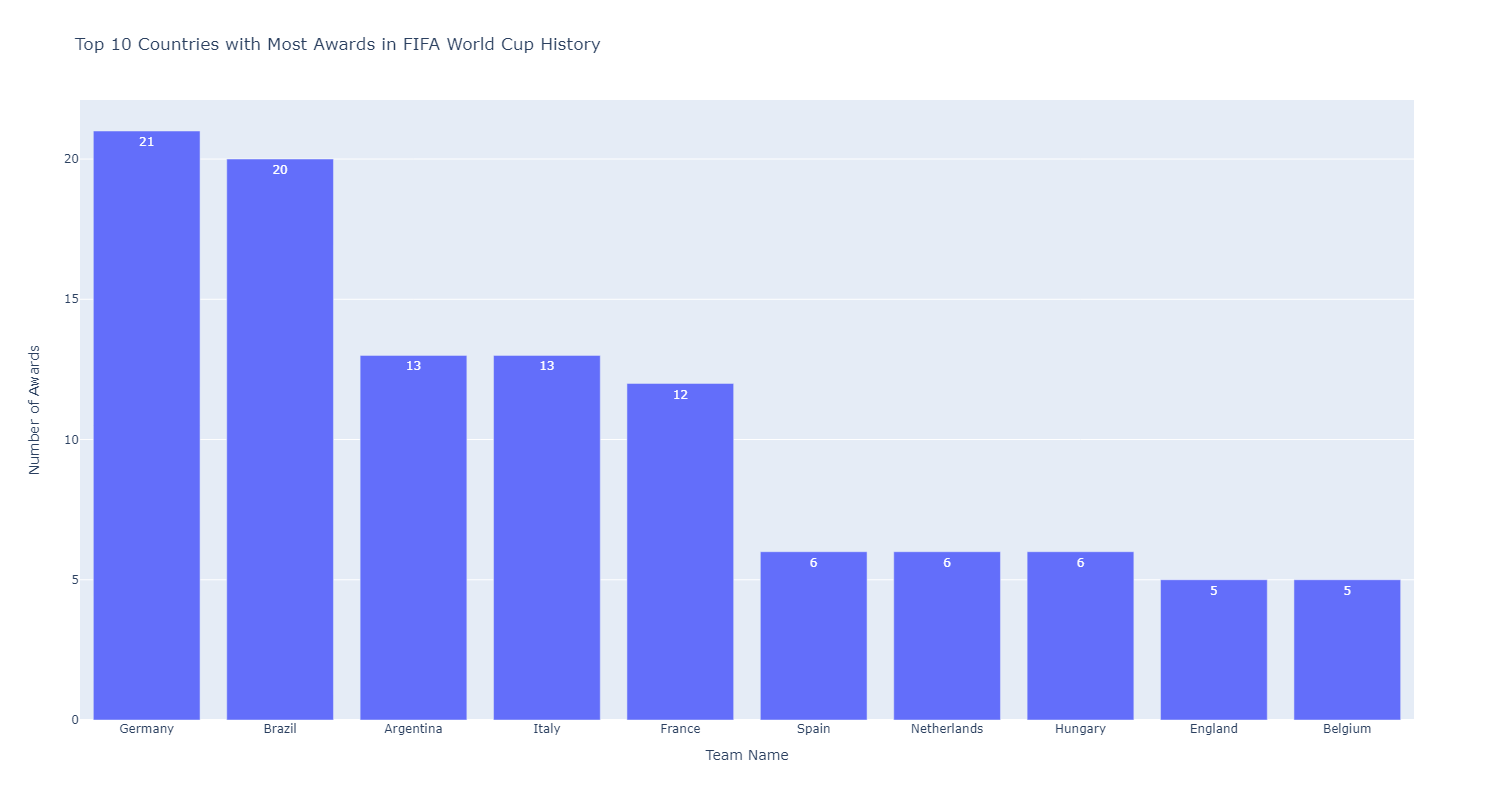

In [46]:
fig = px.bar(df_awardsbycountry, x='Team Name', y='Number of Awards',width=1400,height=800,
             text_auto=True, title='Top 10 Countries with Most Awards in FIFA World Cup History')
fig.show()

Germany has the most players with the highest number of individual prizes at FIFA World cup history, with a number of 21 awards to their name, closely followed by players from Brazil with 20 awards. Argentina and Italy are tied at 13 apiece.

In [48]:
#let's make the name look better

df['Player Name'] = df['Give Name'] + " " + df['Family Name'] 

In [49]:
#drop unnecessary columns

df = df.drop(['Family Name', 'Give Name'], axis=1)

In [50]:
#view the new look of our dataframe

df.head(5)

,Tournament Name,Award Name,Shared,Team Name,Team Code,Player Name
Key ID,,,,,,
1,1930 FIFA World Cup,Golden Boot,0,Argentina,ARG,Guillermo Stábile
2,1930 FIFA World Cup,Silver Boot,0,Uruguay,URY,Pedro Cea
3,1930 FIFA World Cup,Bronze Boot,0,United States,USA,Bert Patenaude
4,1934 FIFA World Cup,Golden Boot,0,Czechoslovakia,CSK,Old?ich Nejedlý
5,1934 FIFA World Cup,Silver Boot,1,Germany,DEU,Edmund Conen


In [51]:
#count of players by award

df.groupby('Player Name')['Player Name'].count()

Player Name
Alcides Ghiggia           1
Andrea Pirlo              1
Andrzej Szarmach          1
Angelo Schiavio           1
Antoine Griezmann         2
                         ..
not applicable Rivaldo    1
not applicable Romário    2
not applicable Ronaldo    4
not applicable Vavá       1
not applicable Zico       1
Name: Player Name, Length: 109, dtype: int64

In [52]:
#rename players name appropriately

df['Player Name'] = df['Player Name'].replace({'not applicable Ronaldo':'Ronaldo',
                                              'not applicable Romário':'Romário',
                                              'not applicable Rivaldo':'Rivaldo',
                                              'not applicable Zico':'Zico',
                                              'not applicable Vavá':'Vavá',
                                              'not applicable Garrincha':'Garrincha',
                                              'not applicable Jairzinho':'Jairzinho',
                                              'not applicable Leônidas':'Leônidas',
                                              'not applicable Neymar':'Neymar',
                                              'not applicable Pelé':'Pelé',
                                              'not applicable Careca':'Careca',
                                              'not applicable Chico':'Chico',
                                              'not applicable Dirceu':'Dirceu',
                                              'not applicable Eusébio':'Eusébio',
                                              'not applicable Falcão':'Falcão',
                                              'not applicable Ademir':'Ademir'})

In [53]:
#Number of world cup categories in FIFA World Cup

num_awards = df.groupby('Award Name')['Award Name'].count()
num_awards = pd.DataFrame(num_awards)
num_awards = num_awards.rename(columns={'Award Name':'Count of Awards'})
num_awards = num_awards.reset_index()
num_awards = num_awards.sort_values('Count of Awards', ascending=False)
num_awards

,Award Name,Count of Awards
7,Silver Boot,31
4,Golden Boot,28
2,Bronze Boot,21
0,Best Young Player,17
1,Bronze Ball,12
3,Golden Ball,12
6,Silver Ball,12
5,Golden Glove,8


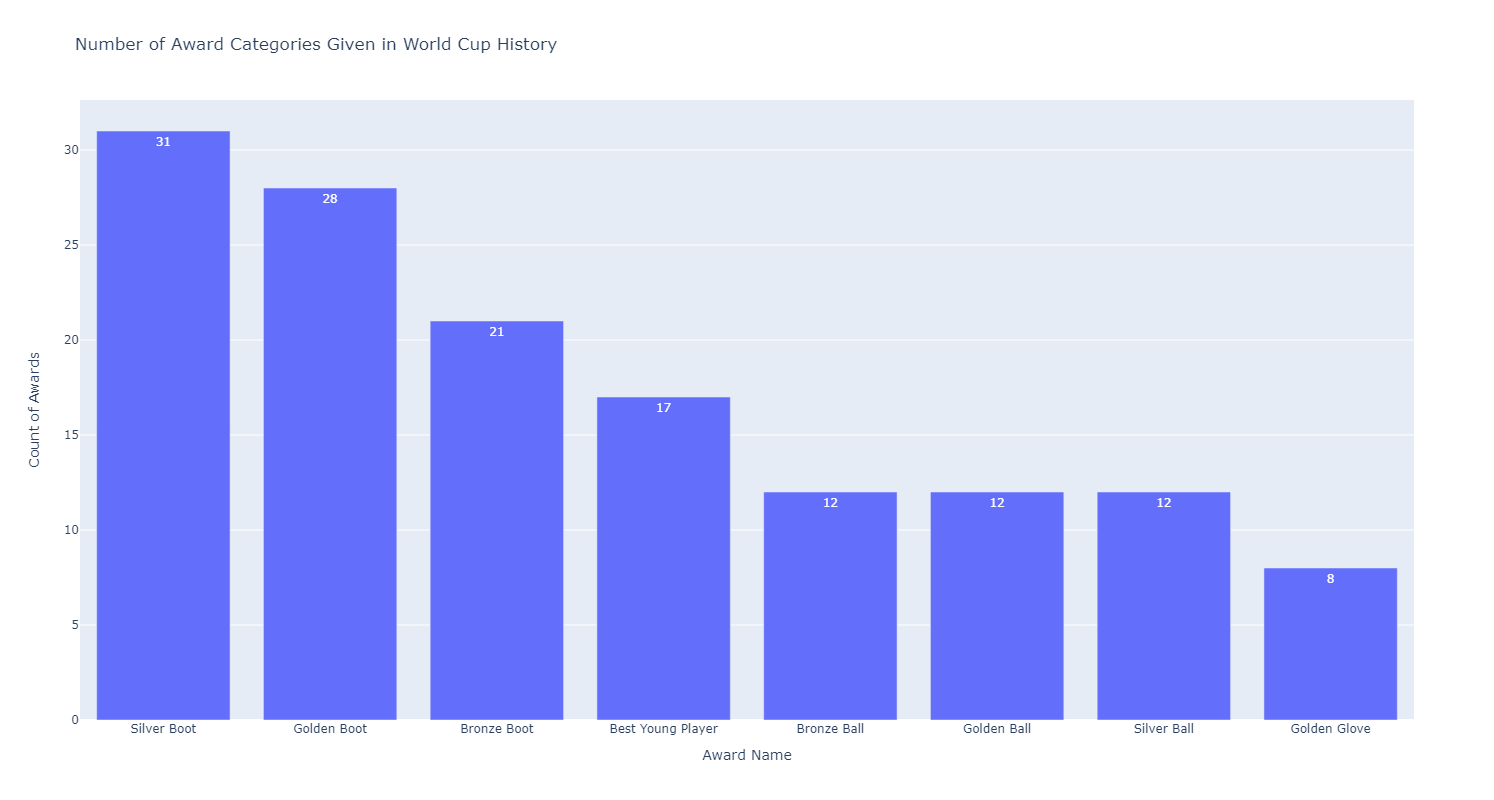

In [54]:
fig = px.bar(num_awards, x='Award Name', y='Count of Awards', width=1400,height=800,
             text_auto=True, title='Number of Award Categories Given in World Cup History')
fig.show()

The Silver boot is the most popular award category given out in FIFA world cup history till date, with Golden boot as the second and Bronze boot the least. This is surprising. What could possibly be wrong that the golden, silver and broze boots are not the same? Is it that some of these awards were not given out in some world cup tournaments?

- A dive into some award categories for better understanding in their varying numbers dished out...

**The bronze boot category:**

In [55]:
bronzeboot = df[df['Award Name']=='Bronze Boot']
bronzeboot = bronzeboot[['Player Name','Tournament Name', 'Team Name']].reset_index()
bronzeboot.drop('Key ID', axis=1)

,Player Name,Tournament Name,Team Name
0,Bert Patenaude,1930 FIFA World Cup,United States
1,Estanislau Basora,1950 FIFA World Cup,Spain
2,Chico,1950 FIFA World Cup,Brazil
3,Alcides Ghiggia,1950 FIFA World Cup,Uruguay
4,Telmo Zarra,1950 FIFA World Cup,Spain
5,Franz Beckenbauer,1966 FIFA World Cup,Germany
6,Ferenc Bene,1966 FIFA World Cup,Hungary
7,Geoff Hurst,1966 FIFA World Cup,England
8,Valeriy Porkujan,1966 FIFA World Cup,Soviet Union
9,Teófilo Cubillas,1970 FIFA World Cup,Peru


In some of the world cup tournaments like 1950 and 1966, there are more than one winner of this award - it was a shared award; and some of the tournaments, noticeably, 1934 and 1938 FIFA World Cup, this award category was not given out. These are some of the reasons for the disparity in the award categories number noticed earlier.

**Silver boot category:**

In [56]:
Silverboot = df[df['Award Name']=='Silver Boot']
Silverboot = Silverboot[['Player Name','Tournament Name', 'Team Name']].reset_index()
Silverboot.drop('Key ID', axis=1)

,Player Name,Tournament Name,Team Name
0,Pedro Cea,1930 FIFA World Cup,Uruguay
1,Edmund Conen,1934 FIFA World Cup,Germany
2,Angelo Schiavio,1934 FIFA World Cup,Italy
3,Silvio Piola,1938 FIFA World Cup,Italy
4,György Sárosi,1938 FIFA World Cup,Hungary
5,Gyula Zsengellér,1938 FIFA World Cup,Hungary
6,Oscar Míguez,1950 FIFA World Cup,Uruguay
7,Josef Hügi,1954 FIFA World Cup,Switzerland
8,Max Morlock,1954 FIFA World Cup,Germany
9,Erich Probst,1954 FIFA World Cup,Austria


Just like what we noticed in the bronze boot category, this award category was also shared by some players in some World Cup tournament.

**Golden boot category:**

In [57]:
#Golden Boot winners at World Cup

GoldenBoot = df[df['Award Name']=='Golden Boot']
GoldenBoot = GoldenBoot[['Player Name','Tournament Name', 'Team Name']].reset_index()
GoldenBoot.drop('Key ID', axis=1)

,Player Name,Tournament Name,Team Name
0,Guillermo Stábile,1930 FIFA World Cup,Argentina
1,Old?ich Nejedlý,1934 FIFA World Cup,Czechoslovakia
2,Leônidas,1938 FIFA World Cup,Brazil
3,Ademir,1950 FIFA World Cup,Brazil
4,Sándor Kocsis,1954 FIFA World Cup,Hungary
5,Just Fontaine,1958 FIFA World Cup,France
6,Flórián Albert,1962 FIFA World Cup,Hungary
7,Garrincha,1962 FIFA World Cup,Brazil
8,Valentin Ivanov,1962 FIFA World Cup,Soviet Union
9,Draan Jerkovi?,1962 FIFA World Cup,Yugoslavia


The 1962 and 1994 FIFA World Cup are the only world cup tournaments that the golden boot award was shared.

**Golden ball winners:**

In [58]:
#Golden Ball winners at World Cup

GoldenBall = df[df['Award Name']=='Golden Ball']
GoldenBall = GoldenBall[['Player Name','Tournament Name', 'Team Name']].reset_index()
GoldenBall.drop('Key ID', axis=1)

,Player Name,Tournament Name,Team Name
0,Mario Kempes,1978 FIFA World Cup,Argentina
1,Paolo Rossi,1982 FIFA World Cup,Italy
2,Diego Maradona,1986 FIFA World Cup,Argentina
3,Salvatore Schillaci,1990 FIFA World Cup,Italy
4,Romário,1994 FIFA World Cup,Brazil
5,Ronaldo,1998 FIFA World Cup,Brazil
6,Oliver Kahn,2002 FIFA World Cup,Germany
7,Zinedine Zidane,2006 FIFA World Cup,France
8,Diego Forlán,2010 FIFA World Cup,Uruguay
9,Lionel Messi,2014 FIFA World Cup,Argentina


This award category started in the 1978 FIFA World Cup tournament and has been won the most by the Argentines with Messi being the only player to have it won twice.

**Golden glove award:**

In [59]:
#List of World Cup Golden Glove Winners

GoldenGloves = df[df['Award Name']=='Golden Glove']
GoldenGloves = GoldenGloves[['Player Name','Tournament Name', 'Team Name']].reset_index()
GoldenGloves.drop('Key ID', axis=1)

,Player Name,Tournament Name,Team Name
0,Michel Preud'homme,1994 FIFA World Cup,Belgium
1,Fabien Barthez,1998 FIFA World Cup,France
2,Oliver Kahn,2002 FIFA World Cup,Germany
3,Gianluigi Buffon,2006 FIFA World Cup,Italy
4,Iker Casillas,2010 FIFA World Cup,Spain
5,Manuel Neuer,2014 FIFA World Cup,Germany
6,Thibaut Courtois,2018 FIFA World Cup,Belgium
7,Emiliano Martínez,2022 FIFA World Cup,Argentina


The golden glove award is given to the best goalkeeper of the tournament and it wss introduced in the 1994 FIFA World Cup. Michel Preud'homme is the first recipient of this award.

**Young Player Award:**

In [60]:
#Best Young Player winners at World Cup

YoungPlayer = df[df['Award Name']=='Best Young Player']
YoungPlayer = YoungPlayer[['Player Name','Tournament Name', 'Team Name']].reset_index()
YoungPlayer.drop('Key ID', axis=1)

,Player Name,Tournament Name,Team Name
0,Pelé,1958 FIFA World Cup,Brazil
1,Flórián Albert,1962 FIFA World Cup,Hungary
2,Franz Beckenbauer,1966 FIFA World Cup,Germany
3,Teófilo Cubillas,1970 FIFA World Cup,Peru
4,W?adys?aw ?muda,1974 FIFA World Cup,Poland
5,Antonio Cabrini,1978 FIFA World Cup,Italy
6,Manuel Amoros,1982 FIFA World Cup,France
7,Enzo Scifo,1986 FIFA World Cup,Belgium
8,Robert Prosine?ki,1990 FIFA World Cup,Yugoslavia
9,Marc Overmars,1994 FIFA World Cup,Netherlands


This award is given to players who shone the brightest at each FIFA World Cup tournaments that are not more than 21 years at the time of the tournament.

**Player with the most awards in FIFA World Cup tournaments**

In [61]:
#Players that have won most awards at the World Cup

result = df.groupby('Player Name')['Award Name'].count()
result = result.reset_index()
result = pd.DataFrame(result)
result = result.rename(columns={'Award Name':'Number of Awards'})
result = result.sort_values('Number of Awards',ascending=False)
result = result.head(10)
result

,Player Name,Number of Awards
100,Thomas Müller,4
93,Ronaldo,4
15,Diego Maradona,3
57,Kylian Mbappé,3
81,Paolo Rossi,3
62,Lionel Messi,3
98,Teófilo Cubillas,3
84,Pelé,2
78,Oliver Kahn,2
32,Franz Beckenbauer,2


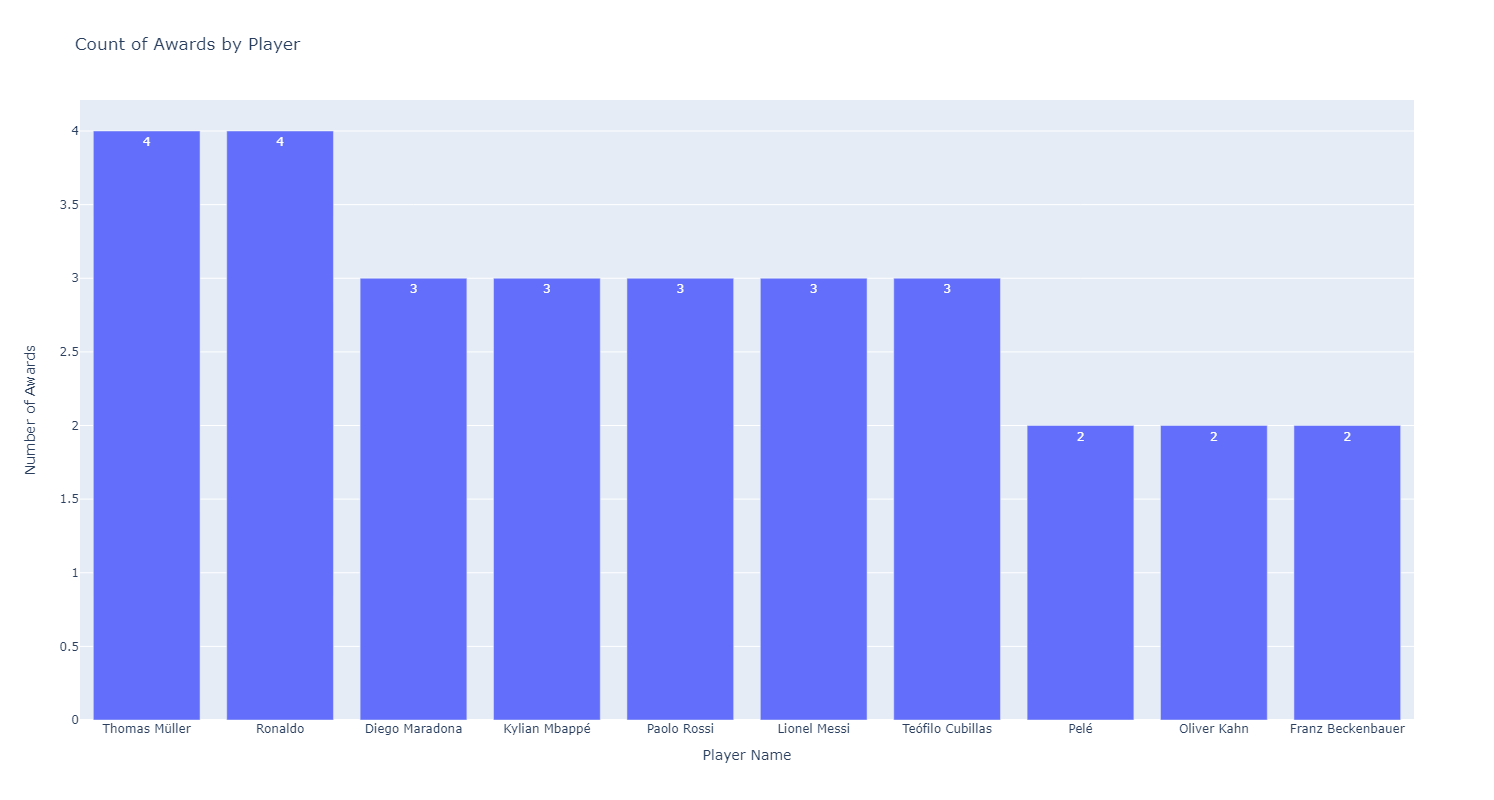

In [62]:
fig = px.bar(result,  x='Player Name', y='Number of Awards',width=1400,height=800,
             text_auto=True, title='Count of Awards by Player')
fig.show()

Thomas Muller and Ronaldo De Lima are the players that have won the most awards at the FIFA World Cup tournaments. They've won a total of 4 awards respectively. Maradona. Mbappe, Rossi, Messi and Cubillas are all tied on 3 awards each at football's most prestigious tournament.

In [29]:
#opt to change the values in the shared column for easier understanding

df['Shared'] = df['Shared'].replace({0:'No', 1:'Yes'})

In [30]:
df_shared = df.groupby('Shared')['Shared'].count()
df_shared = pd.DataFrame(df_shared)
df_shared = df_shared.rename(columns={'Shared': 'Count of Award'}).reset_index()
#df_shared = df_shared['Shared'].replace({0:'No', 1:'Yes'})
df_shared

,Shared,Count of Award
0,No,102
1,Yes,39


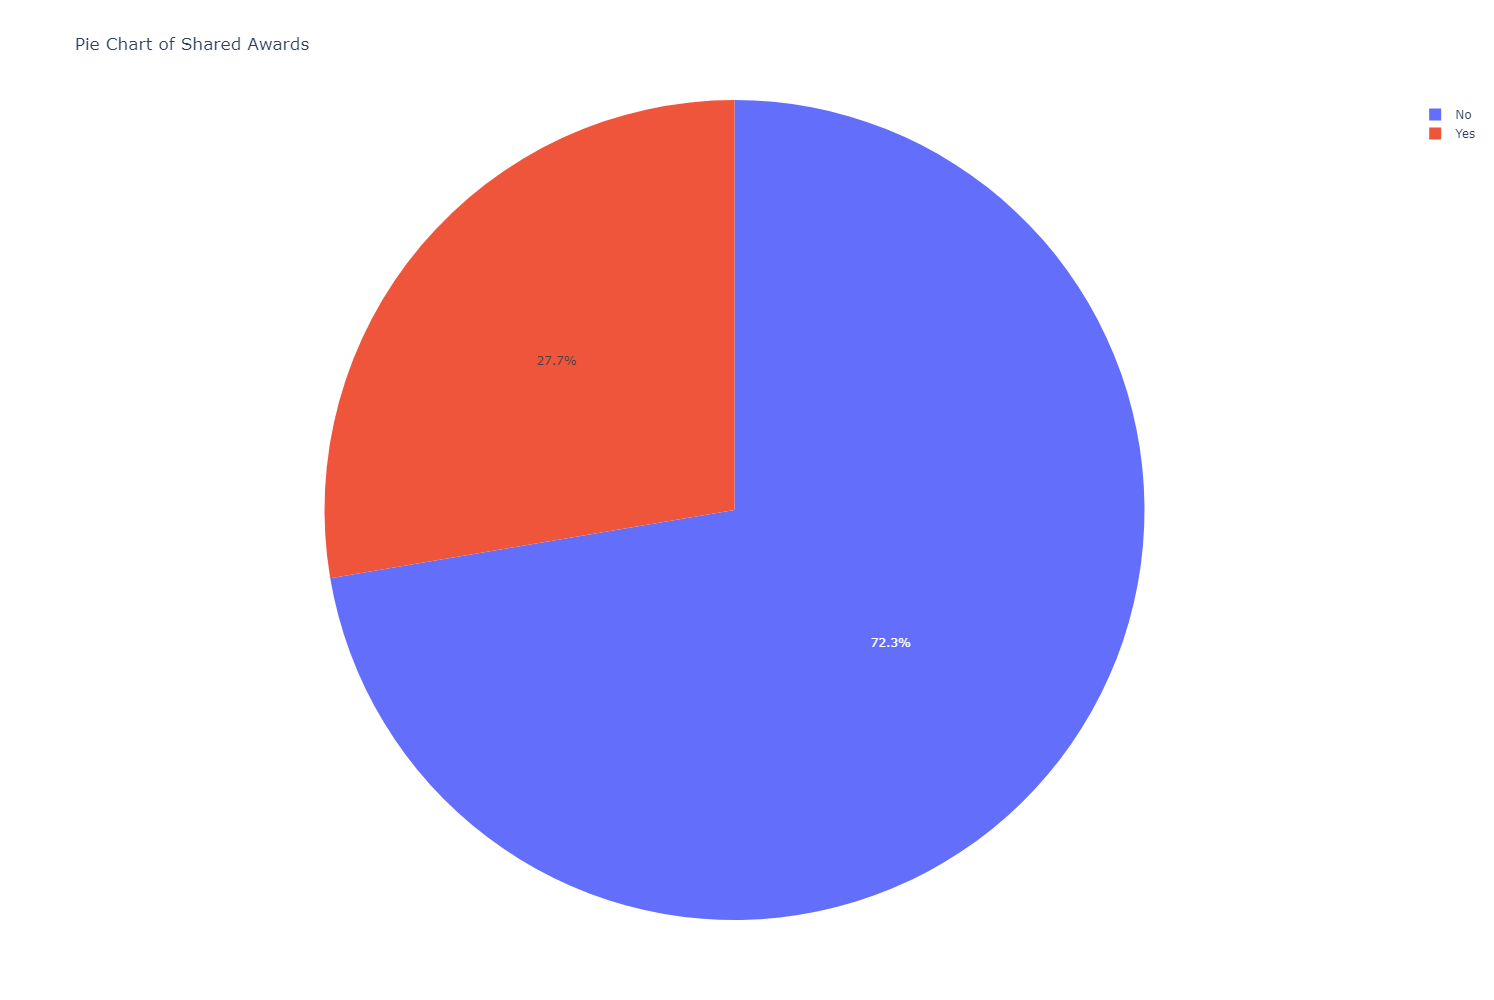

In [36]:
fig = px.pie(df_shared, values = 'Count of Award', names = 'Shared', width=800, height=1000, title='Pie Chart of Shared Awards')
fig.show()

In [35]:
#total number of individual awards given 

df.groupby('Award Name')['Award Name'].count().sum()

141

Of the total 141 individual awards given out in FIFA World Cup,  39 of them have been shared between players which is 27.7% and 102 have not been shared which is 72.3%.